# Analyzing Portfolio Risk and Return

As your quantitative analyst I will do the following:
1. **Evaluate** four new investment options for inclusion in the client portfolios.
2. **Determine** the fund with the most investment potential based on key risk-management metrics: 
    1. Daily Returns 
    2. Standard Deviations, 
    3. Sharpe ratios, 
    4. Betas.

---

## Instructions
1. Import the Data (10 points)
    1. **file**: whale_nav.csv
    2. **tools**: read_csv, Path, pct_change, dropna
2. Analysis (10 points) - Description: 
    1. **plots**:
        1. Daily Returns(four funds and the S&P Index)
        2. Cumulative Returns(four funds and the S&P Index) using `cumprod`
    2. **Question/Answer**:
3. Volatility (10 points) - Description: *Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots*
    1. **plots**:
        1. Box plot to help analyze the volatility of the 4 Whales and the S&P Index
    2. **tools**: drop function to create two dataframes
    3. **Question**:
4. Risk (10 points) - Description: *Evaluate the risk profile of each portfolio by using the standard deviation and the beta*
    1. **Calculations** 
        1. Pandas `std` function to calculate the standard deviation
        2. Annualized standard deviation
    2. **Plot**
        1. 21-day rolling window standard deviations (2 dataframes) 
    3. Questions
5. Risk and Return (15 points) - Description: * To determine the overall risk of an asset or portfolio*
    1. **Calculation**
        1. The annualized average return
        2. Calculate the Sharpe ratios
    2. **Plot**
        1. Plot Sharpe Ratios
    3. **Question**
6. Diversification (15 points) - Description: * Evaluate how the portfolios react relative to the broader market. Recommend Portfolio.*
    1. **Calculate**
        1. Calculate the variance of the S&P 500
        2. Calculate the covariance for each portfolio
        3. Calculate the beta of the portfolio
    2. **Plot**
        1. Plot the 60-day rolling beta
    3. **Question**

7. Coding Conventions and Formatting (10 points)
8. Deployment and Submission (10 points)
9. Code Comments (10 points)

### IMPORTS

In [2]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### FUNCTIONS

In [3]:
def datetime_stock_data_csv(abs_path, local_path):
    
    """
    This function uses botg the read_csv function and the Path module to read the whale_navs.csv file into a Pandas DataFrame. 
    with the datetime field as the Index.It takes two arguments: the absolute path and the local path.
    """
    
    # Path Check
    print(f"For your information:")
    #print("\n")
    print(f"1. This the the absolute path you entered: \n\t{abs_path}")
    print(f"2. And this is the local: \n\t{local_path}")
    print("\n")
    
    # Using 'Path' from pathlib
    whales_csv_path = Path(abs_path + local_path)

    # Reading whale_navs.csv into a pandas dataframe
    whales_df = pd.read_csv(
        whales_csv_path, 
        index_col="date", 
        infer_datetime_format=True, 
        parse_dates=True
    )
    
    # Printing the first five rows of the whale_navs dataframe
    #. 1. Confirm that date is the index
    print(f"These are the first five records of the whales_nav dataframe:")
    #print('\n')
    display(whales_df.head())


    return(whales_df)

In [52]:
def dataframe_whisperer(df):
    
    """
    This program returns interesting information about our dataframe
    """
    shape = df.shape
    index = df.index.name
    
    # Print statements
    print(f"Here are some stats about your dataframe:")
    print(f"\t1. Your dataframe has {shape[0]} rows and {shape[1]} columns")
    print(f"\t2. It's index: {index}")
    print(f"\t3. These are the columns in the dataframe:  {df.columns.to_list()}")
    print(f"4. These are the datatypes in the dataframe\n")
    display(df.dtypes)
    print(f"\n5. Describing the Dataframe:\n")
    display(df.describe())

### THE FUN STUFF

In [5]:
# PART 1. Send path information to datetime_stock_data_csv function
# Local and Absolute Paths                    
abs_path = os.getcwd()
local_path = '/Resources/whale_navs.csv'

#Function call to get the df of whale stock data
whale_data_df = datetime_stock_data_csv(abs_path, local_path)


For your information:
1. This the the absolute path you entered: 
	/Users/comdrpaquiot/Desktop/Fintech-WorkSpace/Python_Project/Mod4_Challenge/GitHub_Loader/Challenge4_InvestmentOptionsEval
2. And this is the local: 
	/Resources/whale_navs.csv


These are the first five records of the whales_nav dataframe:


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


In [6]:
# PART 2. Cleanup Dataframe for Readibility and Plotting 
# For Readability the columns names should change: SRSM, PLSN, TIGR, BRKA, S&P500
print(f"The Column names are too long. Let me fix that!")
whale_data_df.columns = ['SRSM', 'PLSN', 'TIGR','BRKA', 'S&P500']
print(f"This is a lot cleaner! This is better for graphing.\n")
display(whale_data_df.head())


The Column names are too long. Let me fix that!
This is a lot cleaner! This is better for graphing.



,SRSM,PLSN,TIGR,BRKA,S&P500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


In [53]:
# PART 3: Dataframe Information
# I like the idea of getting some insight into my dataframe, how many rows and records and what are the columns.
# I created the dataframe whisperer, it will tell me:
#     1) index   2) columns  3) Datatypes  4)Number of Records

dataframe_whisperer(whale_data_df)

Here are some stats about your dataframe:
	1. Your dataframe has 1498 rows and 5 columns
	2. It's index: date
	3. These are the columns in the dataframe:  ['SRSM', 'PLSN', 'TIGR', 'BRKA', 'S&P500']
4. These are the datatypes in the dataframe



SRSM      float64
PLSN      float64
TIGR      float64
BRKA      float64
S&P500    float64
dtype: object


5. Describing the Dataframe:



,SRSM,PLSN,TIGR,BRKA,S&P500
count,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000
mean,30.917449,14.846051,60.738068,56.672164,250.638925
std,0.485997,0.240011,0.751144,4.185067,41.005779
min,29.982497,14.032967,59.375252,51.105327,182.860000
25%,30.453881,14.714174,60.230331,52.088281,210.157500
50%,30.795678,14.882191,60.594338,57.766241,247.425000
75%,31.350904,14.991809,60.766422,60.369093,283.262500
max,32.315955,15.438711,63.511175,65.578492,357.700000


1. Use the Pandas `pct_change` function together w/ `dropna` to create the daily returns DataFrame. 
    1. Review the first five rows of the DataFrame.

In [8]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
whls_dailyreturns_df = whale_data_df.pct_change().dropna().copy()
whls_dailyreturns_df.head()


,SRSM,PLSN,TIGR,BRKA,S&P500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

## <span style='background :pink' >Quantitative Analysis </span>
<span style='background :pink' >The analysis has several components:</span>
1. Performance 
2. Volatility 
3. Risk 
4. Risk-return profile
5. Portfolio diversification


# <span style='background :pink' >Performance Analysis</span>
---
<span style='background :pink' >**Goal**: Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.</span>
1. Use the default Pandas plot function to visualize the daily return data of the four fund portfolios and the S&P 500.
2. Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500 index. 
    1. Review the last five rows.
3. Use the default Pandas plot to visualize the cumulative return values for the four funds and the S&P 500 over time.

### <span style='background :pink' > Daily Returns Plot: 4 Whales 1 Fund</span

<AxesSubplot:title={'center':'Whales Daily Returns'}, xlabel='date'>

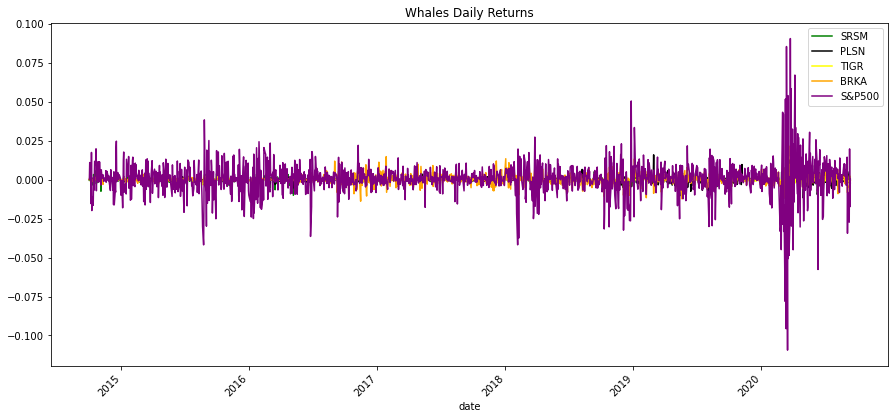

In [12]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size

whls_dailyreturns_df['SRSM'].plot(legend=True,figsize=(15,7), rot=45, color="green",title='Whales Daily Returns',label='SRSM')
whls_dailyreturns_df['PLSN'].plot(legend=True,figsize=(15,7), rot=45, color="black", label="PLSN")
whls_dailyreturns_df['TIGR'].plot(legend=True,figsize=(15,7), rot=45, color='yellow', label="TIGR")
whls_dailyreturns_df['BRKA'].plot(legend=True,figsize=(15,7), rot=45, color="orange", label="BRKA")
whls_dailyreturns_df['S&P500'].plot(legend=True,figsize=(15,7), rot=45, color="purple", label="S&P500")


### <span style='background :pink' >Cumulative Returns Plot w `cumprod` <span>

In [54]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Calculate the cumulative returns using the 'cumprod()' function
cumulative_returns = (1 + whls_dailyreturns_df).cumprod().dropna()
display(cumulative_returns.tail())
print("\n")
print("Curious about the dataframe:")
dataframe_whisperer(cumulative_returns)

,SRSM,PLSN,TIGR,BRKA,S&P500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858




Curious about the dataframe:
Here are some stats about your dataframe:
	1. Your dataframe has 1497 rows and 5 columns
	2. It's index: date
	3. These are the columns in the dataframe:  ['SRSM', 'PLSN', 'TIGR', 'BRKA', 'S&P500']
4. These are the datatypes in the dataframe



SRSM      float64
PLSN      float64
TIGR      float64
BRKA      float64
S&P500    float64
dtype: object


5. Describing the Dataframe:



,SRSM,PLSN,TIGR,BRKA,S&P500
count,1497.000000,1497.000000,1497.000000,1497.000000,1497.000000
mean,0.967653,0.990270,1.012684,1.090986,1.289820
std,0.015193,0.016013,0.012524,0.080554,0.210927
min,0.938412,0.936041,0.989953,0.983765,0.940880
25%,0.953162,0.981475,1.004210,1.002700,1.081451
50%,0.963863,0.992685,1.010291,1.112004,1.273116
75%,0.981216,0.999995,1.013149,1.162099,1.457628
max,1.011446,1.029809,1.058911,1.262370,1.840494


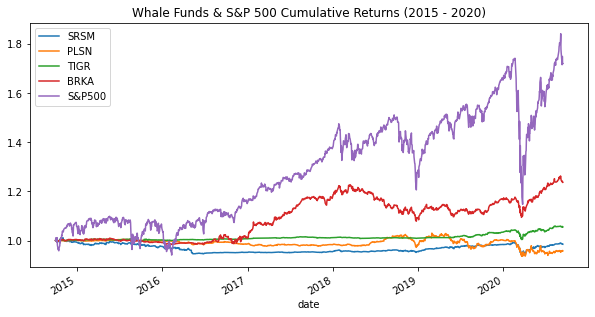

In [14]:
# Visualize the cumulative returns using the Pandas plot function
ax = cumulative_returns.plot(
    legend="True",
    figsize=(10,5),
    title="Whale Funds & S&P 500 Cumulative Returns (2015 - 2020)")
ax.legend(["SRSM", "PLSN", "TIGR", "BRKA", "S&P500"])

#### Step 4: Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** # Nothing outperforms the market. The advise that Vogle and Buffet have given is to match the S&P 500

---

# <span style='background :pink' >Analyze the Volatility </span>
<span style='background :pink' >Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.</span
1. Use the Pandas `drop` function to create a new DataFrame with just the four fund portfolios (drop the S&P 500 column). 
2. Visualize the daily return data for just the four fund portfolios by using another box plot. 

### <span style='background :pink' >Daily Returns Box Plot: 4 Whales 1 Index</span>

<AxesSubplot:title={'center':' Daily Returns Box Plot: 4 Whales 1 Index'}>

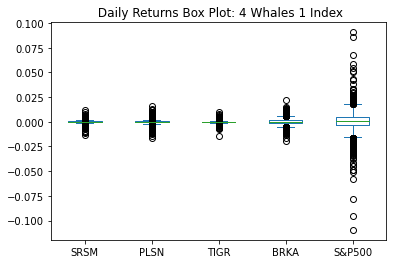

In [48]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
whls_dailyreturns_df.plot.box(
    title=" Daily Returns Box Plot: 4 Whales 1 Index")

### <span style='background :pink' >Daily Returns Box Plot: 4 Whales No Index</span>

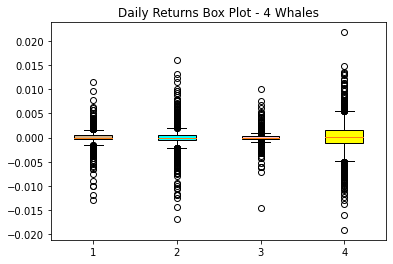

In [19]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
# Create box plots to reflect the return data for only the 4 fund portfolios
# Include a title parameter and adjust the figure size

# created another dataframe  that is a copy of my whls_dailyreturns_df
# The S&P500 column has been dropped
daily_returns_df = whls_dailyreturns_df.copy()
daily_returns_df = daily_returns_df.drop(columns=['S&P500'])

# Plotting
colors = ['tan', 'cyan', 'pink', 'yellow', 'green']

daily_returns_plot = plt.boxplot(
    daily_returns_df, 
    patch_artist=True) 

# Add title to my plot
plt.title('Daily Returns Box Plot - 4 Whales')

# Different boxes different colors
for patch, color in zip(daily_returns_plot['boxes'], colors):
    patch.set_facecolor(color)
plt.show()

#### Step 3: Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** The spread of all the data is represented on a boxplot by the horizontal distance between the smallest value and the largest value, including any outliers. BRKA has the great volatility and the least volatile is TIGR

---

# <span style='background :pink' >Analyze the Risk</span>

<span style='background :pink' >Evaluate the risk profile of each portfolio by using the standard deviation and the beta.</span>
1. Use the Pandas std function to calculate the standard deviation for each of the four portfolios and for the S&P 500. 
    1. Review the standard deviation calculations, sorted from smallest to largest.
2. Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500.
3. Use the daily returns df and a 21-day rolling window to plot the rolling std-dev of the four fund portfolios and of the S&P 500 index. 

### <span style='background :pink' > Standard Deviation </span>

In [20]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
# Review the standard deviations sorted smallest to largest
standard_deviation = whls_dailyreturns_df.std()
standard_deviation.sort_values()

TIGR      0.000996
SRSM      0.001405
PLSN      0.002199
BRKA      0.003256
S&P500    0.011550
dtype: float64

### <span style='background :pink' >Annualized Standard Deviation </span>

In [21]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
# Review the annual standard deviations smallest to largest

standard_deviation_annlzd = whls_dailyreturns_df.std()* np.sqrt(252)
standard_deviation_annlzd.sort_values()

TIGR      0.015804
SRSM      0.022297
PLSN      0.034912
BRKA      0.051692
S&P500    0.183345
dtype: float64

### <span style='background :pink' >Rolling Standard deviation Plot: 4 Whales 1 Index </span>

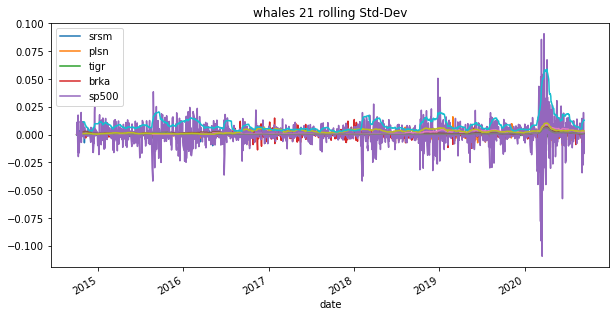

In [47]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size

# Set figure of the daily closing prices of aapl
ax = whls_dailyreturns_df.plot(legend=True,figsize=(10,5),rot=45, title="whales 21 rolling Std-Dev")

# Plot 30-Day Rolling Mean on the same figure
whls_dailyreturns_df.rolling(window=21).std().plot(ax=ax)

# Set the legend of the figure
ax.legend(["srsm", "plsn", "tigr", "brka", "sp500"])



### <span style='background :pink' >Rolling Standard deviation Plot: 4 Whales No Index </span>

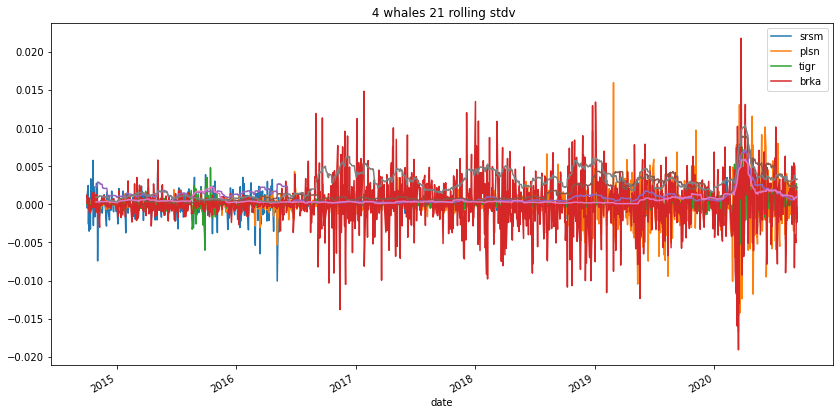

In [23]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
# Include a title parameter and adjust the figure size
ax=daily_returns_df.plot(legend=True,figsize=(14,7),rot=45, title=" 4 whales 21 rolling stdv")

daily_returns_df.rolling(window=21).std().plot(ax=ax)

# Set the legend of the figure
ax.legend(["srsm", "plsn", "tigr", "brka"])




#### Step 5: Answer the following three questions:

1. Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

2. Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

3. Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** # YOUR ANSWER HERE

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** # YOUR ANSWER HERE


**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** # YOUR ANSWER HERE

---

# <span style='background :pink' >Analyze the Risk-Return Profile</span>
<span style='background :pink' >Goal: Determine the overall risk of an asset or portfolio, consider the Sharpe ratios for each portfolio.</span>
1. Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500
    *sorted from lowest to highest*
2. Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500
3. Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart

### <span style='background :pink' >Annual Avg Return</span>

In [27]:
# Annual average return formula:
#     average_annual_return_portfolio_a_b = daily_returns_a_b.mean() * year_trading_days

yearly_trading_days =252
avg_annual_return = whls_dailyreturns_df.mean() * yearly_trading_days
avg_annual_return.sort_values()

PLSN     -0.006633
SRSM     -0.002281
TIGR      0.009151
BRKA      0.037090
S&P500    0.108102
dtype: float64

### <span style='background :pink' > Sharpe Ratios </span>

In [28]:
# Sharpe Ratios Formula:
#     sharpe_ratios = average_annual_return_portfolio_a_b / annual_std_dev_portfolios_a_b
whale_annual_stddev = whls_dailyreturns_df.std() * np.sqrt(yearly_trading_days)
whale_annual_stddev.sort_values()


TIGR      0.015804
SRSM      0.022297
PLSN      0.034912
BRKA      0.051692
S&P500    0.183345
dtype: float64

In [29]:
# Sharpe ratio calculations 
whale_sharpe_ratios = avg_annual_return/whale_annual_stddev
whale_sharpe_ratios.sort_values()


PLSN     -0.189998
SRSM     -0.102290
TIGR      0.579002
S&P500    0.589612
BRKA      0.717512
dtype: float64

### <span style='background :pink' >Sharpe Ratio Plot</span>

<AxesSubplot:title={'center':'Sharpe Ratios'}>

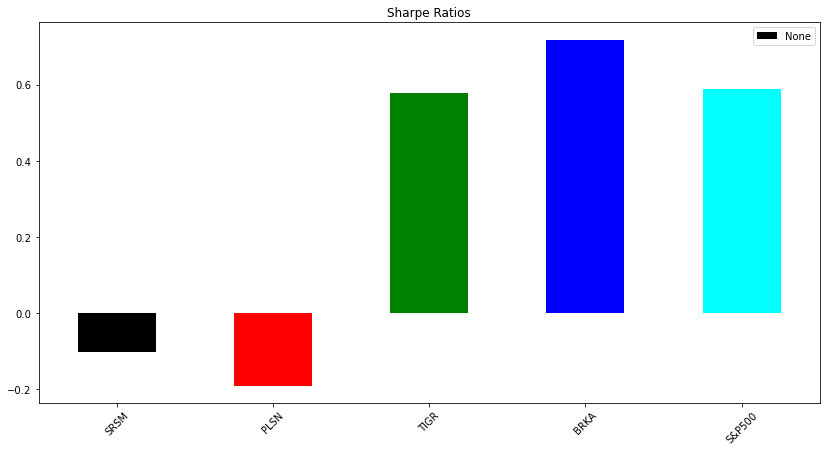

In [45]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size

whale_sharpe_ratios.plot.bar(legend=True, 
                             figsize=(14,7), 
                             rot=45, 
                             color=['black', 'red', 'green', 'blue', 'cyan'], 
                             title="Sharpe Ratios")


#### Step 4: Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** # YOUR ANSWER HERE

---

# <span style='background :pink' >Diversify the Portfolio</span>
<span style='background :pink' >Evaluate how the portfolios react relative to the broader market. Choose two portfolios that you’re most likely to recommend as investment options.</span>
1. Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. *Display last 5 rows.*
2. For each of the two portfolios:
    1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance.
    2. Calculate the beta of the portfolio
    3. Use the Pandas mean function to calculate the average value of the 60-day rolling beta of the portfolio.
    4. Plot the 60-day rolling beta.

### <span style='background :pink' > Calculate S&P500 Variance</span>

In [34]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
#    Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
print(f"This is the variance of the S&P500 using a rollign 60 day window: ")
snp5_60rw_var = whls_dailyreturns_df['S&P500'].rolling(window=60).var()
snp5_60rw_var.tail()

This is the variance of the S&P500 using a rollign 60 day window


date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P500, dtype: float64

### <span style='background :pink' >BRKA and TIGR Covariance</span>

In [33]:
# Find the BRKA and TIGR covariance
# Formula: 
brka_60rllwn_covar = whls_dailyreturns_df['BRKA'].rolling(window=60).cov(snp5_60rw_var)
tigr_60rllwn_covar = whls_dailyreturns_df['TIGR'].rolling(window=60).cov(snp5_60rw_var)

print(f"Covariance of BRKA:")
display(brka_60rllwn_covar.tail())
print("\n")
print(f"Covariance of TIGR:")
display(tigr_60rllwn_covar.tail())


Covariance of BRKA:


date
2020-09-04    7.537738e-08
2020-09-08    5.979353e-08
2020-09-09    4.478451e-08
2020-09-10    3.565820e-08
2020-09-11    3.034646e-08
dtype: float64



Covariance of TIGR:


date
2020-09-04    2.712286e-09
2020-09-08   -2.454167e-09
2020-09-09   -1.081029e-08
2020-09-10   -1.501395e-08
2020-09-11   -1.450795e-08
dtype: float64

### <span style='background :pink' >Calculate the BRKA and TIGR Beta.</span>

In [36]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
brka_beta = brka_60rllwn_covar/snp5_60rw_var
tigr_beta = tigr_60rllwn_covar/snp5_60rw_var


display(brka_beta.tail())
print("\n")
display(tigr_beta.tail())

date
2020-09-04    0.000733
2020-09-08    0.000517
2020-09-09    0.000373
2020-09-10    0.000295
2020-09-11    0.000252
dtype: float64

date
2020-09-04    0.000026
2020-09-08   -0.000021
2020-09-09   -0.000090
2020-09-10   -0.000124
2020-09-11   -0.000121
dtype: float64

### <span style='background :pink' >Calculate the avrg value of the 60-day rolling beta of BRKA and TIGR</span>

In [40]:
# Calculate the average of the 60-day rolling beta
brka_beta_60rllwin = brka_beta.rolling(window=60).mean()
tigr_beta_60rllwin = tigr_beta.rolling(window=60).mean()

### <span style='background :pink' >Plotting the 60-day rolling beta.</span>

<AxesSubplot:title={'center':'Rolling Beta'}, xlabel='date'>

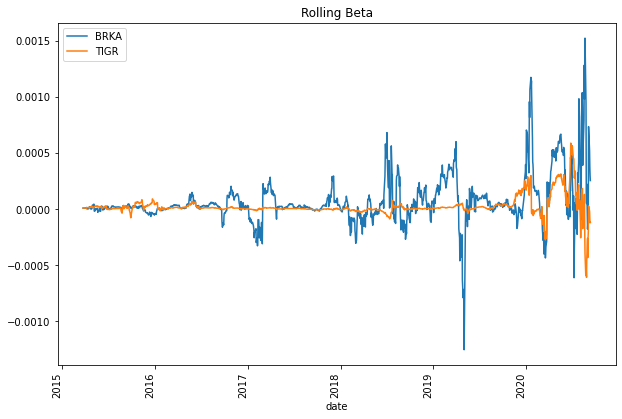

In [41]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size

brka_beta.plot(legend=True,
    figsize=(10,7),
    rot=90,
    title='Rolling Beta',
    label='BRKA')

tigr_beta.plot(legend=True,
    figsize=(10,7),
    rot=90,
    title='Rolling Beta',
    label='TIGR')



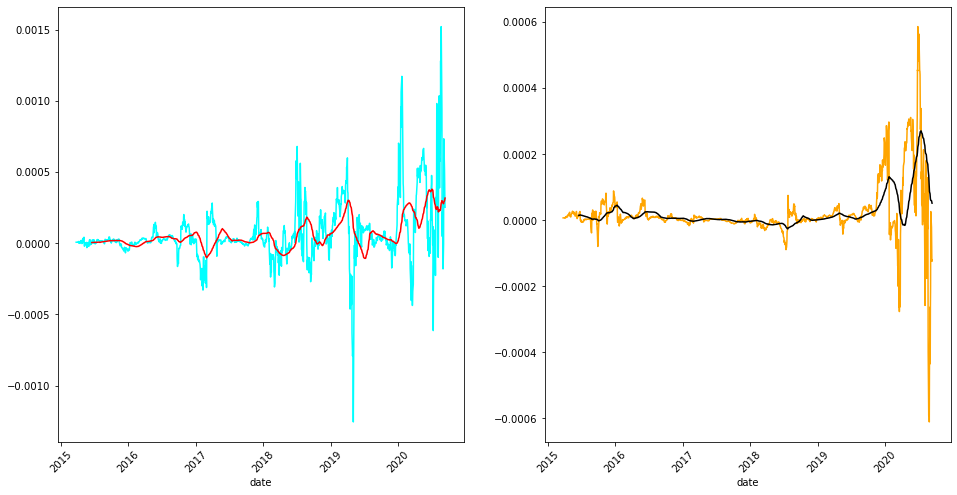

In [43]:
# Create subplot figure with having two side by side plots
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(16,8))

# plot first pandas frame in subplot style
brka_beta.plot(
    ax = axes[0],
    subplots=True,
    rot=45,
    color='cyan') 
brka_beta_60rllwin.plot(
    ax = axes[0],
    subplots=True,
    rot=45,
    color='red', 
    label="BRKA_beta_rollin")

# plot second pandas frame in subplot style
tigr_beta.plot(
    ax = axes[1],
    subplots=True,
    rot=45,
    color='orange') 
tigr_beta_60rllwin.plot(
    ax = axes[1],
    subplots=True,
    rot=45,
    color='black') 

plt.show()

#### Answer the following two questions:

1. Which of the two portfolios seem more sensitive to movements in the S&P 500?

2. Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** # YOUR ANSWER HERE


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** # YOUR ANSWER HERE

---